#Deep learning-based human activity recognition using CNN, ConvLSTM, and LRCN

### Loading of data

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/human-activity-recognition/data/UCF50')

In [ ]:
!unrar x UCF50.rar

Streaming output truncated to the last 5000 lines.
Extracting  UCF50/HorseRace/v_HorseRace_g16_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v

In [ ]:
!ls

BaseballPitch  HorseRace       PizzaTossing	   Rowing
Basketball     HorseRiding     PlayingGuitar	   SalsaSpin
BenchPress     HulaHoop        PlayingPiano	   SkateBoarding
Biking	       JavelinThrow    PlayingTabla	   Skiing
Billiards      JugglingBalls   PlayingViolin	   Skijet
BreastStroke   JumpingJack     PoleVault	   SoccerJuggling
CleanAndJerk   JumpRope        PommelHorse	   Swing
Diving	       Kayaking        PullUps		   TaiChi
Drumming       Lunges	       Punch		   TennisSwing
Fencing        MilitaryParade  PushUps		   ThrowDiscus.rar
GolfSwing      Mixing	       RockClimbingIndoor
HighJump       Nunchucks       RopeClimbing


In [ ]:
%cd ..

/content/drive/MyDrive/human-activity-recognition/data


In [ ]:
import os
os.chdir('/content/drive/MyDrive/human-activity-recognition/data')

### UCF50

In [4]:
ROOT = "/content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50"
folders = [f for f in os.listdir(ROOT) if os.path.isdir(os.path.join(ROOT, f))]

print("UCF50 Classes:")
for f in folders:
    print(f)

UCF50 Classes:
MilitaryParade
Mixing
Nunchucks
PizzaTossing
PlayingGuitar
PlayingPiano
PlayingViolin
PullUps
Punch
RockClimbingIndoor
RopeClimbing
Rowing
SkateBoarding
Skiing
Skijet
SoccerJuggling
Swing
TaiChi
TennisSwing
ThrowDiscus
VolleyballSpiking
WalkingWithDog
SalsaSpin
YoYo
TrampolineJumping
PoleVault
PushUps
PommelHorse
PlayingTabla
BaseballPitch
Basketball
BenchPress
Biking
Billiards
BreastStroke
CleanAndJerk
Diving
Drumming
Fencing
GolfSwing
HighJump
HorseRace
HorseRiding
HulaHoop
JavelinThrow
JugglingBalls
JumpingJack
JumpRope
Kayaking
Lunges


In [6]:
import cv2
SAVE_DIR = "/content/drive/MyDrive/human-activity-recognition/data/UCF50/frame_samples"
os.makedirs(SAVE_DIR, exist_ok=True)

video_exts = (".avi", ".mp4", ".mov", ".mkv")

for cls in sorted(os.listdir(ROOT)):
    cls_path = os.path.join(ROOT, cls)
    if not os.path.isdir(cls_path):
        continue

    # Find video files
    videos = [v for v in os.listdir(cls_path) if v.lower().endswith(video_exts)]
    if len(videos) == 0:
        print(f"No videos found in {cls}")
        continue

    # Take first video only
    video_path = os.path.join(cls_path, videos[0])
    print("Processing:", video_path)

    # Read video and extract middle frame
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < 1:
        cap.release()
        print("  Could not read frames.")
        continue

    middle_idx = total_frames // 2
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_idx)

    ret, frame = cap.read()
    cap.release()

    if not ret:
        print("  Failed to extract frame.")
        continue

    # Convert to RGB for saving
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Save image
    save_path = os.path.join(SAVE_DIR, f"{cls}.jpg")
    cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

print("Done.")

Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/BaseballPitch/v_BaseballPitch_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/Basketball/v_Basketball_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/BenchPress/v_BenchPress_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/Biking/v_Biking_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/Billiards/v_Billards_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/BreastStroke/v_BreastStroke_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/CleanAndJerk/v_CleanAndJerk_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/Diving/v_Diving_g01_c01.avi
Processing: /content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50/Drummi

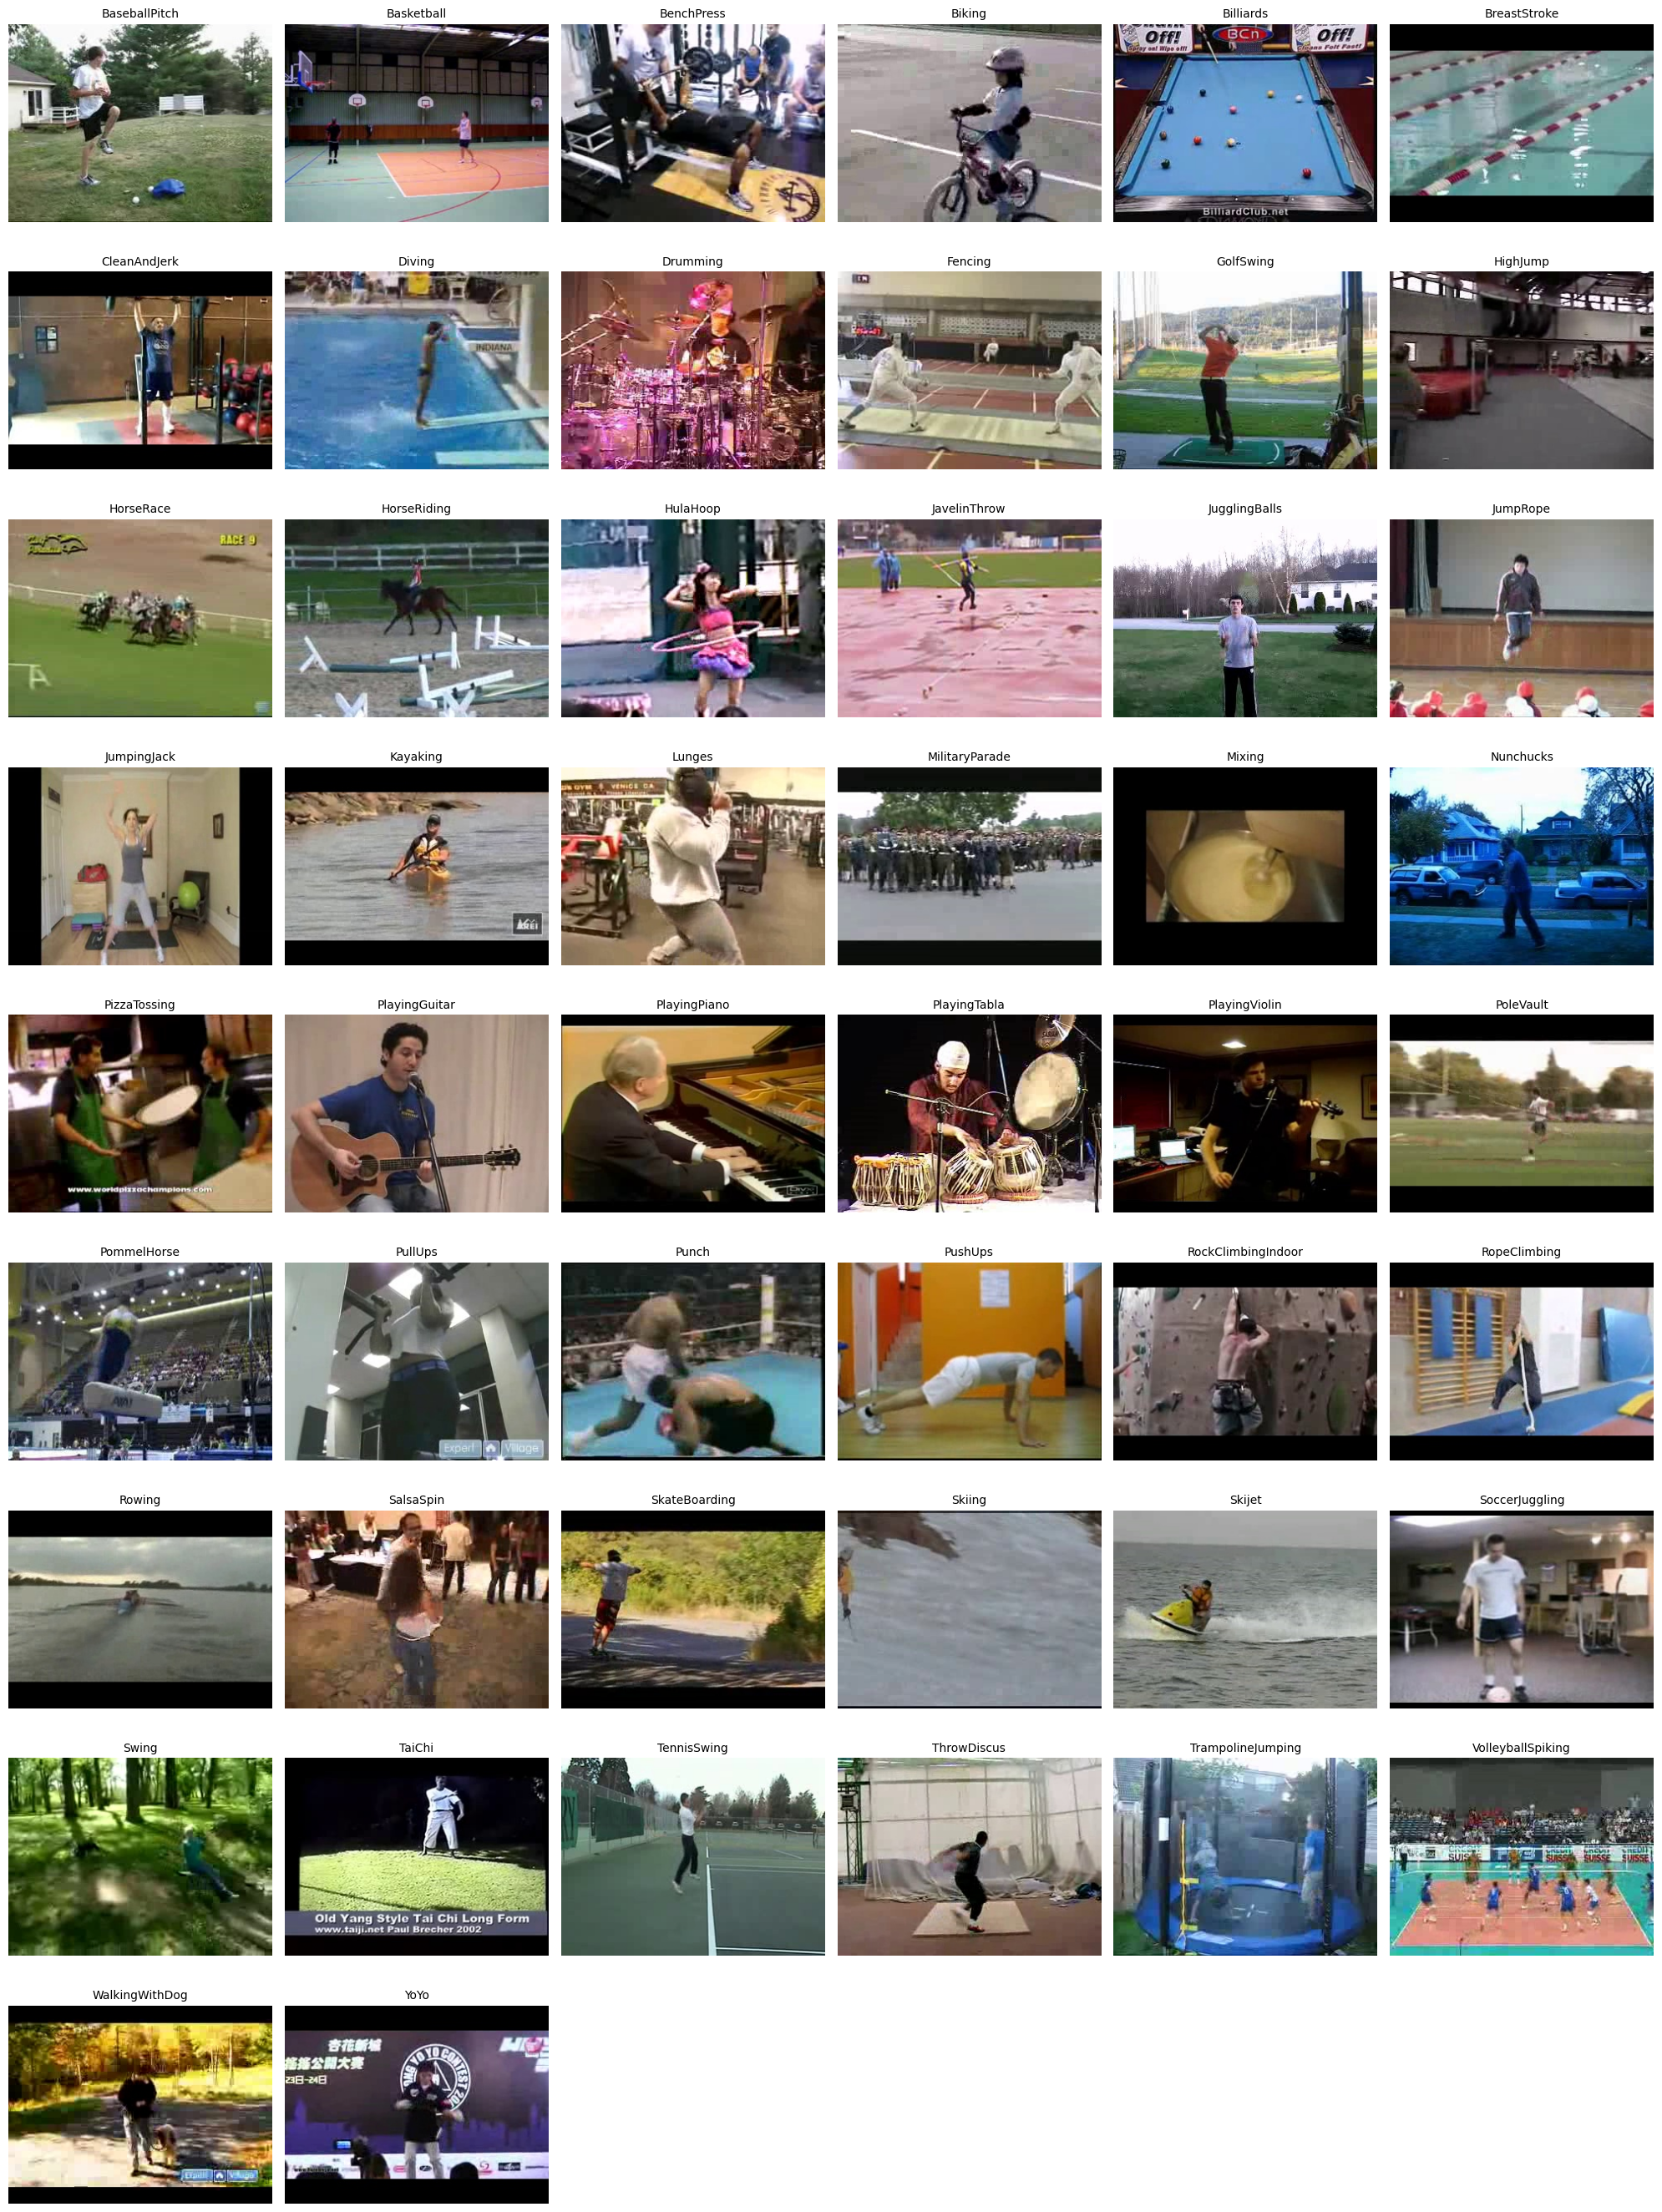

In [7]:
import math
import matplotlib.pyplot as plt
from PIL import Image

FOLDER = "/content/drive/MyDrive/human-activity-recognition/data/UCF50/frame_samples"

# Load all images
images = []
labels = []
for fname in sorted(os.listdir(FOLDER)):
    if fname.lower().endswith((".jpg", ".png")):
        path = os.path.join(FOLDER, fname)
        img = Image.open(path)
        images.append(img)
        labels.append(os.path.splitext(fname)[0])

# Determine grid size
n = len(images)
cols = 6
rows = math.ceil(n / cols)

plt.figure(figsize=(20, 3 * rows))

for i, (img, label) in enumerate(zip(images, labels)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(label, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Implementation

### Preprocessing Techniques Applied:


1.   Sharpening Filter (40% probability)
2. Edge Enhancement (30% probability)
3. Histogram Equalization (30% probability)
4. Noise Reduction (20% probability)
5. CLAHE in frame loading
6. Color Jitter, Rotation, Affine transforms
7. Gaussian Blur & Random Erasing



### CNN Model Implementation

In [11]:
import os, random, cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
from torchvision import transforms
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from PIL import Image, ImageFilter, ImageEnhance
import torchvision.transforms.functional as F

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Custom transform for sharpening
class SharpeningFilter:
    def __init__(self, probability=0.5, sharpness_factor=2.0):
        self.probability = probability
        self.sharpness_factor = sharpness_factor

    def __call__(self, img):
        if random.random() < self.probability:
            # Convert tensor to PIL Image for sharpening
            if isinstance(img, torch.Tensor):
                img_pil = F.to_pil_image(img)
            else:
                img_pil = Image.fromarray((img * 255).astype(np.uint8))

            # Apply sharpening filter
            enhancer = ImageEnhance.Sharpness(img_pil)
            img_pil = enhancer.enhance(self.sharpness_factor)

            # Convert back to tensor or numpy
            if isinstance(img, torch.Tensor):
                return F.to_tensor(img_pil)
            else:
                return np.array(img_pil).astype(np.float32) / 255.0
        return img

# Custom transform for histogram equalization
class HistogramEqualization:
    def __init__(self, probability=0.3):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_np = img.permute(1, 2, 0).numpy() * 255
            else:
                img_np = (img * 255).astype(np.uint8)

            # Convert to YUV and equalize Y channel
            img_yuv = cv2.cvtColor(img_np.astype(np.uint8), cv2.COLOR_RGB2YUV)
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

            if isinstance(img, torch.Tensor):
                return torch.tensor(img_eq / 255.0, dtype=torch.float32).permute(2, 0, 1)
            else:
                return img_eq.astype(np.float32) / 255.0
        return img

# Custom transform for edge enhancement
class EdgeEnhancement:
    def __init__(self, probability=0.3):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_pil = F.to_pil_image(img)
            else:
                img_pil = Image.fromarray((img * 255).astype(np.uint8))

            # Apply edge enhancement filter
            img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)

            if isinstance(img, torch.Tensor):
                return F.to_tensor(img_pil)
            else:
                return np.array(img_pil).astype(np.float32) / 255.0
        return img

# Custom transform for noise reduction
class NoiseReduction:
    def __init__(self, probability=0.2):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_np = img.permute(1, 2, 0).numpy() * 255
            else:
                img_np = (img * 255).astype(np.uint8)

            # Apply median blur for noise reduction
            img_denoised = cv2.medianBlur(img_np.astype(np.uint8), 3)

            if isinstance(img, torch.Tensor):
                return torch.tensor(img_denoised / 255.0, dtype=torch.float32).permute(2, 0, 1)
            else:
                return img_denoised.astype(np.float32) / 255.0
        return img

# Data collection - BALANCED data
def get_balanced_dataset(root_dir, max_classes=20, samples_per_class=15):
    items = []
    classes = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])

    # Take balanced number of classes
    selected_classes = classes[:max_classes]
    print(f"Using {len(selected_classes)} classes")

    for cls in tqdm(selected_classes, desc="Loading classes"):
        cdir = os.path.join(root_dir, cls)
        videos = [f for f in os.listdir(cdir) if f.endswith(('.mp4', '.avi', '.mkv', '.mov'))]

        # Take balanced samples per class
        for v in videos[:samples_per_class]:
            items.append((os.path.join(cdir, v), cls))

    label_map = {c: i for i, c in enumerate(selected_classes)}
    print(f"Total samples: {len(items)}")
    return items, label_map

# Enhanced frame sampling with preprocessing
def load_frames_enhanced(video_path, num_frames=8, size=(112, 112)):
    try:
        cap = cv2.VideoCapture(video_path)
        frames = []
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if total_frames < 1:
            return None

        # Apply basic preprocessing to each frame as we load it
        for i in range(num_frames):
            frame_idx = min(i * total_frames // num_frames, total_frames - 1)
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()

            if ret:
                # Convert to RGB
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Apply basic OpenCV preprocessing
                # 1. Resize
                frame = cv2.resize(frame, size)

                # 2. Contrast Limited Adaptive Histogram Equalization (CLAHE)
                lab = cv2.cvtColor(frame, cv2.COLOR_RGB2LAB)
                lab_planes = list(cv2.split(lab))
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                lab_planes[0] = clahe.apply(lab_planes[0])
                lab = cv2.merge(lab_planes)
                frame = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

                # 3. Mild sharpening with kernel
                kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                frame = cv2.filter2D(frame, -1, kernel)

                frames.append(frame)
            else:
                # Create a black frame if reading fails
                frames.append(np.zeros((size[1], size[0], 3), dtype=np.uint8))

        cap.release()

        if len(frames) == 0:
            return None

        # Ensure we have exactly num_frames
        while len(frames) < num_frames:
            frames.append(frames[-1].copy() if frames else np.zeros((size[1], size[0], 3), dtype=np.uint8))

        return np.array(frames[:num_frames]).astype(np.float32) / 255.0

    except Exception as e:
        print(f"Error loading {video_path}: {e}")
        return None

class EnhancedVideoDataset(Dataset):
    def __init__(self, items, label_map, num_frames=8, size=(112, 112), transform=None, is_training=False):
        self.items = items
        self.label_map = label_map
        self.num_frames = num_frames
        self.size = size
        self.is_training = is_training
        self.transform = transform

        # Pre-compute validation transform (minimal preprocessing)
        self.val_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        video_path, label_str = self.items[idx]

        # Use enhanced frame loading with built-in preprocessing
        frames = load_frames_enhanced(video_path, self.num_frames, self.size)
        if frames is None:
            # Create random frames as fallback
            frames = np.random.rand(self.num_frames, self.size[1], self.size[0], 3).astype(np.float32)

        # Apply transforms
        if self.is_training and self.transform:
            frames_t = torch.stack([self.transform(f) for f in frames])
        else:
            frames_t = torch.stack([self.val_transform(f) for f in frames])

        label = self.label_map[label_str]
        return frames_t, label

# Enhanced CNN Model
class EnhancedCNN(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()
        # Use ResNet18 as backbone
        resnet = models.resnet18(pretrained=pretrained)

        # Freeze early layers for faster training
        for param in list(resnet.parameters())[:-8]:
            param.requires_grad = False

        self.backbone = nn.Sequential(*list(resnet.children())[:-1])
        self.feature_dim = resnet.fc.in_features

        # Enhanced classifier
        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(self.feature_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        B, T, C, H, W = x.shape
        x = x.view(B * T, C, H, W)
        features = self.backbone(x).view(B, T, -1)
        features = features.mean(dim=1)  # Average over time
        return self.classifier(features)

# Enhanced training function
def enhanced_train(model, train_loader, val_loader, test_loader, epochs=15, lr=0.001):
    model = model.to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    best_val_acc = 0

    print("Starting enhanced training with preprocessing...")

    for epoch in range(epochs):
        # Training phase with progress bar
        model.train()
        total_loss = 0
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')

        for data, target in train_pbar:
            data, target = data.to(DEVICE), target.to(DEVICE)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()

            # Gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            total_loss += loss.item()

            # Update progress bar
            train_pbar.set_postfix({'Loss': f'{loss.item():.4f}'})

        avg_loss = total_loss / len(train_loader)

        # Validation phase
        model.eval()
        correct = 0
        total = 0
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')

        with torch.no_grad():
            for data, target in val_pbar:
                data, target = data.to(DEVICE), target.to(DEVICE)
                output = model(data)
                pred = output.argmax(dim=1)
                correct += (pred == target).sum().item()
                total += target.size(0)

                current_acc = correct / total
                val_pbar.set_postfix({'Acc': f'{current_acc:.3f}'})

        val_acc = correct / total

        # Step the scheduler
        scheduler.step()
        current_lr = scheduler.get_last_lr()[0]

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Val Acc = {val_acc:.3f}, LR = {current_lr:.6f}")

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_enhanced_cnn_model.pth')
            print(f"  -> New best model saved! (Val Acc: {best_val_acc:.3f})")

        # Early stopping if validation plateaus
        if epoch > 8 and val_acc < best_val_acc - 0.05:
            print("Early stopping triggered!")
            break

    # Load best model for final test
    model.load_state_dict(torch.load('best_enhanced_cnn_model.pth'))

    # Final test evaluation
    model.eval()
    correct = 0
    total = 0
    test_pbar = tqdm(test_loader, desc='Final Test')

    with torch.no_grad():
        for data, target in test_pbar:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)

            current_acc = correct / total
            test_pbar.set_postfix({'Acc': f'{current_acc:.3f}'})

    test_acc = correct / total
    print(f"\n{'='*50}")
    print(f"FINAL TEST ACCURACY: {test_acc:.3f}")
    print(f"Best Validation Accuracy: {best_val_acc:.3f}")
    print(f"{'='*50}")

    return model, test_acc

# MAIN EXECUTION - ENHANCED PREPROCESSING VERSION
print("=" * 60)
print("CNN Model")
print("=" * 60)

ROOT = "/content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50"

# Get balanced data
print("Loading balanced dataset...")
items, label_map = get_balanced_dataset(
    ROOT,
    max_classes=20,
    samples_per_class=70
)

print(f"Total samples collected: {len(items)}")

# Split data
random.shuffle(items)
n = len(items)
train_items = items[:int(0.7 * n)]
val_items = items[int(0.7 * n):int(0.85 * n)]
test_items = items[int(0.85 * n):]

print(f"Training: {len(train_items)}, Validation: {len(val_items)}, Test: {len(test_items)}")
print(f"Number of classes: {len(label_map)}")

# DATA PREPROCESSING TRANSFORMS

# Training transform with extensive preprocessing
train_transform = transforms.Compose([
    # Basic preprocessing
    transforms.ToTensor(),

    # Color and contrast adjustments
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),

    # Geometric transformations
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),

    # Custom preprocessing filters
    SharpeningFilter(probability=0.4, sharpness_factor=2.0),
    EdgeEnhancement(probability=0.3),
    HistogramEqualization(probability=0.3),
    NoiseReduction(probability=0.2),

    # Advanced augmentations
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3)),

    # Final normalization
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Validation transform (minimal preprocessing)
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create datasets
print("Creating datasets with enhanced preprocessing...")
train_ds = EnhancedVideoDataset(train_items, label_map, num_frames=8, size=(112, 112),
                               transform=train_transform, is_training=True)
val_ds = EnhancedVideoDataset(val_items, label_map, num_frames=8, size=(112, 112),
                             transform=val_transform, is_training=False)
test_ds = EnhancedVideoDataset(test_items, label_map, num_frames=8, size=(112, 112),
                              transform=val_transform, is_training=False)

# Create data loaders
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=8, shuffle=False, num_workers=2)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False, num_workers=2)

# Create and train enhanced model
print("Training CNN Model...")
model = EnhancedCNN(num_classes=len(label_map))

trained_model, final_accuracy = enhanced_train(
    model, train_loader, val_loader, test_loader, epochs=10, lr=0.001
)

# Final evaluation
print(f"\nFinal Model Performance: {final_accuracy*100:.2f}%")

# Sample predictions
print(f"\nSample Predictions:")
class_names = list(label_map.keys())
trained_model.eval()
with torch.no_grad():
    for i in range(min(3, len(test_ds))):
        sample, true_label = test_ds[i]
        sample = sample.unsqueeze(0).to(DEVICE)
        output = trained_model(sample)
        prediction = output.argmax(dim=1).item()
        confidence = torch.softmax(output, dim=1).max().item()

        true_class = class_names[true_label]
        pred_class = class_names[prediction]
        correct = "✓" if prediction == true_label else "✗"

        print(f"Sample {i+1}: {correct} True = {true_class:15} Predicted = {pred_class:15} Confidence = {confidence:.3f}")

print(f"\n{'='*60}")
print("TRAINING COMPLETED!")
print(f"{'='*60}")


Using device: cuda
CNN Model
Loading balanced dataset...
Using 20 classes


Loading classes: 100%|██████████| 20/20 [00:00<00:00, 193.98it/s]

Total samples: 1400
Total samples collected: 1400
Training: 979, Validation: 211, Test: 210
Number of classes: 20
Creating datasets with enhanced preprocessing...
Training CNN Model...


Starting enhanced training with preprocessing...


Epoch 1/10 [Val]: 100%|██████████| 27/27 [00:31<00:00,  1.18s/it, Acc=0.592]


Epoch 1: Loss = 2.2415, Val Acc = 0.592, LR = 0.001000
  -> New best model saved! (Val Acc: 0.592)


Epoch 2/10 [Val]: 100%|██████████| 27/27 [00:08<00:00,  3.10it/s, Acc=0.706]


Epoch 2: Loss = 1.4033, Val Acc = 0.706, LR = 0.001000
  -> New best model saved! (Val Acc: 0.706)


Epoch 3/10 [Val]: 100%|██████████| 27/27 [00:08<00:00,  3.20it/s, Acc=0.754]


Epoch 3: Loss = 1.1777, Val Acc = 0.754, LR = 0.001000
  -> New best model saved! (Val Acc: 0.754)


Epoch 4/10 [Val]: 100%|██████████| 27/27 [00:08<00:00,  3.09it/s, Acc=0.815]


Epoch 4: Loss = 0.9580, Val Acc = 0.815, LR = 0.001000
  -> New best model saved! (Val Acc: 0.815)


Epoch 5/10 [Val]: 100%|██████████| 27/27 [00:09<00:00,  2.94it/s, Acc=0.796]


Epoch 5: Loss = 0.8685, Val Acc = 0.796, LR = 0.000500


Epoch 6/10 [Val]: 100%|██████████| 27/27 [00:10<00:00,  2.68it/s, Acc=0.853]


Epoch 6: Loss = 0.6347, Val Acc = 0.853, LR = 0.000500
  -> New best model saved! (Val Acc: 0.853)


Epoch 7/10 [Val]: 100%|██████████| 27/27 [00:08<00:00,  3.15it/s, Acc=0.858]


Epoch 7: Loss = 0.5498, Val Acc = 0.858, LR = 0.000500
  -> New best model saved! (Val Acc: 0.858)


Epoch 8/10 [Val]: 100%|██████████| 27/27 [00:08<00:00,  3.22it/s, Acc=0.848]


Epoch 8: Loss = 0.4992, Val Acc = 0.848, LR = 0.000500


Epoch 9/10 [Val]: 100%|██████████| 27/27 [00:09<00:00,  2.82it/s, Acc=0.886]


Epoch 9: Loss = 0.4511, Val Acc = 0.886, LR = 0.000500
  -> New best model saved! (Val Acc: 0.886)


Epoch 10/10 [Val]: 100%|██████████| 27/27 [00:09<00:00,  2.73it/s, Acc=0.863]


Epoch 10: Loss = 0.4934, Val Acc = 0.863, LR = 0.000250


Final Test: 100%|██████████| 27/27 [00:36<00:00,  1.36s/it, Acc=0.924]



FINAL TEST ACCURACY: 0.924
Best Validation Accuracy: 0.886

Final Model Performance: 92.38%

Sample Predictions:
Sample 1: ✓ True = JumpRope        Predicted = JumpRope        Confidence = 0.719
Sample 2: ✓ True = Fencing         Predicted = Fencing         Confidence = 1.000
Sample 3: ✓ True = BaseballPitch   Predicted = BaseballPitch   Confidence = 1.000

TRAINING COMPLETED!


### ConvLSTM Model Implementation

In [14]:
import os, random, cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
from torchvision import transforms
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from PIL import Image, ImageFilter, ImageEnhance
import torchvision.transforms.functional as F

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Custom transform for sharpening
class SharpeningFilter:
    def __init__(self, probability=0.5, sharpness_factor=2.0):
        self.probability = probability
        self.sharpness_factor = sharpness_factor

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_pil = F.to_pil_image(img)
            else:
                img_pil = Image.fromarray((img * 255).astype(np.uint8))

            enhancer = ImageEnhance.Sharpness(img_pil)
            img_pil = enhancer.enhance(self.sharpness_factor)

            if isinstance(img, torch.Tensor):
                return F.to_tensor(img_pil)
            else:
                return np.array(img_pil).astype(np.float32) / 255.0
        return img

# Custom transform for histogram equalization
class HistogramEqualization:
    def __init__(self, probability=0.3):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_np = img.permute(1, 2, 0).numpy() * 255
            else:
                img_np = (img * 255).astype(np.uint8)

            img_yuv = cv2.cvtColor(img_np.astype(np.uint8), cv2.COLOR_RGB2YUV)
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

            if isinstance(img, torch.Tensor):
                return torch.tensor(img_eq / 255.0, dtype=torch.float32).permute(2, 0, 1)
            else:
                return img_eq.astype(np.float32) / 255.0
        return img

# Custom transform for edge enhancement
class EdgeEnhancement:
    def __init__(self, probability=0.3):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_pil = F.to_pil_image(img)
            else:
                img_pil = Image.fromarray((img * 255).astype(np.uint8))

            img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)

            if isinstance(img, torch.Tensor):
                return F.to_tensor(img_pil)
            else:
                return np.array(img_pil).astype(np.float32) / 255.0
        return img

# Custom transform for noise reduction
class NoiseReduction:
    def __init__(self, probability=0.2):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_np = img.permute(1, 2, 0).numpy() * 255
            else:
                img_np = (img * 255).astype(np.uint8)

            img_denoised = cv2.medianBlur(img_np.astype(np.uint8), 3)

            if isinstance(img, torch.Tensor):
                return torch.tensor(img_denoised / 255.0, dtype=torch.float32).permute(2, 0, 1)
            else:
                return img_denoised.astype(np.float32) / 255.0
        return img

# Data collection - BALANCED data
def get_balanced_dataset(root_dir, max_classes=20, samples_per_class=15):
    items = []
    classes = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])

    selected_classes = classes[:max_classes]
    print(f"Using {len(selected_classes)} classes")

    for cls in tqdm(selected_classes, desc="Loading classes"):
        cdir = os.path.join(root_dir, cls)
        videos = [f for f in os.listdir(cdir) if f.endswith(('.mp4', '.avi', '.mkv', '.mov'))]

        for v in videos[:samples_per_class]:
            items.append((os.path.join(cdir, v), cls))

    label_map = {c: i for i, c in enumerate(selected_classes)}
    print(f"Total samples: {len(items)}")
    return items, label_map

# Enhanced frame sampling with preprocessing
def load_frames_enhanced(video_path, num_frames=8, size=(112, 112)):
    try:
        cap = cv2.VideoCapture(video_path)
        frames = []
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if total_frames < 1:
            return None

        for i in range(num_frames):
            frame_idx = min(i * total_frames // num_frames, total_frames - 1)
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()

            if ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame = cv2.resize(frame, size)

                # Apply basic OpenCV preprocessing
                lab = cv2.cvtColor(frame, cv2.COLOR_RGB2LAB)
                lab_planes = list(cv2.split(lab))
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                lab_planes[0] = clahe.apply(lab_planes[0])
                lab = cv2.merge(lab_planes)
                frame = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

                kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                frame = cv2.filter2D(frame, -1, kernel)

                frames.append(frame)
            else:
                frames.append(np.zeros((size[1], size[0], 3), dtype=np.uint8))

        cap.release()

        if len(frames) == 0:
            return None

        while len(frames) < num_frames:
            frames.append(frames[-1].copy() if frames else np.zeros((size[1], size[0], 3), dtype=np.uint8))

        return np.array(frames[:num_frames]).astype(np.float32) / 255.0

    except Exception as e:
        print(f"Error loading {video_path}: {e}")
        return None

class EnhancedVideoDataset(Dataset):
    def __init__(self, items, label_map, num_frames=8, size=(112, 112), transform=None, is_training=False):
        self.items = items
        self.label_map = label_map
        self.num_frames = num_frames
        self.size = size
        self.is_training = is_training
        self.transform = transform

        self.val_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        video_path, label_str = self.items[idx]

        frames = load_frames_enhanced(video_path, self.num_frames, self.size)
        if frames is None:
            frames = np.random.rand(self.num_frames, self.size[1], self.size[0], 3).astype(np.float32)

        if self.is_training and self.transform:
            frames_t = torch.stack([self.transform(f) for f in frames])
        else:
            frames_t = torch.stack([self.val_transform(f) for f in frames])

        label = self.label_map[label_str]
        return frames_t, label

# FIXED ConvLSTM Model Implementation
class FixedConvLSTMModel(nn.Module):
    def __init__(self, num_classes, hidden_dim=64, num_layers=1, dropout=0.3):
        super().__init__()

        # Encoder: Initial convolutional layers to reduce spatial dimensions
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 112x112 -> 56x56

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 56x56 -> 28x28

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 28x28 -> 14x14
        )

        # Fixed ConvLSTM Layer
        self.conv_lstm = FixedConvLSTMLayer(
            input_dim=256,
            hidden_dim=hidden_dim,
            kernel_size=(3, 3),
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes)
        )

    def forward(self, x):
        batch_size, seq_len, C, H, W = x.shape

        # Process each frame through encoder
        encoded_frames = []
        for t in range(seq_len):
            frame = x[:, t]
            encoded_frame = self.encoder(frame)
            encoded_frames.append(encoded_frame)

        encoded_sequence = torch.stack(encoded_frames, dim=1)

        # ConvLSTM processing
        conv_lstm_out, _ = self.conv_lstm(encoded_sequence)

        # Take the last output for classification
        last_output = conv_lstm_out[:, -1]

        # Classification
        output = self.classifier(last_output)
        return output

# Fixed ConvLSTM Layer Implementation
class FixedConvLSTMLayer(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, num_layers, batch_first=True, dropout=0.0):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.num_layers = num_layers
        self.batch_first = batch_first

        self.cells = nn.ModuleList()
        for i in range(num_layers):
            layer_input_dim = input_dim if i == 0 else hidden_dim
            self.cells.append(FixedConvLSTMCell(layer_input_dim, hidden_dim, kernel_size))

        self.dropout = nn.Dropout(dropout) if dropout > 0 else None

    def forward(self, x, hidden_state=None):
        if self.batch_first:
            x = x.permute(1, 0, 2, 3, 4)

        seq_len, batch_size, _, height, width = x.shape

        if hidden_state is None:
            hidden_state = self._init_hidden(batch_size, height, width, x.device)

        layer_output = x
        for layer_idx in range(self.num_layers):
            h, c = hidden_state[layer_idx]
            outputs = []

            for t in range(seq_len):
                h, c = self.cells[layer_idx](layer_output[t], h, c)
                outputs.append(h)

            layer_output = torch.stack(outputs, dim=0)

            if self.dropout is not None and layer_idx < self.num_layers - 1:
                layer_output = self.dropout(layer_output)

        if self.batch_first:
            layer_output = layer_output.permute(1, 0, 2, 3, 4)

        return layer_output, hidden_state

    def _init_hidden(self, batch_size, height, width, device):
        hidden = []
        for _ in range(self.num_layers):
            h = torch.zeros(batch_size, self.hidden_dim, height, width, device=device)
            c = torch.zeros(batch_size, self.hidden_dim, height, width, device=device)
            hidden.append((h, c))
        return hidden

# Fixed ConvLSTM Cell Implementation (removed LayerNorm)
class FixedConvLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, bias=True):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(
            in_channels=input_dim + hidden_dim,
            out_channels=4 * hidden_dim,
            kernel_size=kernel_size,
            padding=self.padding,
            bias=bias
        )

    def forward(self, x, h_prev, c_prev):
        combined = torch.cat([x, h_prev], dim=1)
        conv_output = self.conv(combined)

        i, f, g, o = torch.chunk(conv_output, 4, dim=1)

        # Apply activations directly (no LayerNorm)
        i = torch.sigmoid(i)
        f = torch.sigmoid(f)
        g = torch.tanh(g)
        o = torch.sigmoid(o)

        c_next = f * c_prev + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

# Fixed training function for ConvLSTM
def train_fixed_convlstm(model, train_loader, val_loader, test_loader, epochs=15, lr=0.001):
    model = model.to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    best_val_acc = 0

    print("Starting ConvLSTM training...")

    for epoch in range(epochs):
        # Training phase
        model.train()
        total_loss = 0
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')

        for data, target in train_pbar:
            data, target = data.to(DEVICE), target.to(DEVICE)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            total_loss += loss.item()

            train_pbar.set_postfix({'Loss': f'{loss.item():.4f}'})

        avg_loss = total_loss / len(train_loader)

        # Validation phase
        model.eval()
        correct = 0
        total = 0
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')

        with torch.no_grad():
            for data, target in val_pbar:
                data, target = data.to(DEVICE), target.to(DEVICE)
                output = model(data)
                pred = output.argmax(dim=1)
                correct += (pred == target).sum().item()
                total += target.size(0)

                current_acc = correct / total
                val_pbar.set_postfix({'Acc': f'{current_acc:.3f}'})

        val_acc = correct / total

        scheduler.step()
        current_lr = scheduler.get_last_lr()[0]

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Val Acc = {val_acc:.3f}, LR = {current_lr:.6f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_fixed_convlstm_model.pth')
            print(f"  -> New best model saved! (Val Acc: {best_val_acc:.3f})")

        if epoch > 8 and val_acc < best_val_acc - 0.05:
            print("Early stopping triggered!")
            break

    # Load best model for final test
    model.load_state_dict(torch.load('best_fixed_convlstm_model.pth'))

    # Final test evaluation
    model.eval()
    correct = 0
    total = 0
    test_pbar = tqdm(test_loader, desc='Final Test')

    with torch.no_grad():
        for data, target in test_pbar:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)

            current_acc = correct / total
            test_pbar.set_postfix({'Acc': f'{current_acc:.3f}'})

    test_acc = correct / total
    print(f"\n{'='*50}")
    print(f"FINAL CONVLSTM TEST ACCURACY: {test_acc:.3f}")
    print(f"Best Validation Accuracy: {best_val_acc:.3f}")
    print(f"{'='*50}")

    return model, test_acc

# MAIN EXECUTION - FIXED CONVLSTM WITH PREPROCESSING
print("=" * 60)
print(" CONVLSTM WITH PREPROCESSING")
print("=" * 60)

ROOT = "/content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50"

# Get balanced data
print("Loading balanced dataset...")
items, label_map = get_balanced_dataset(
    ROOT,
    max_classes=20,
    samples_per_class=50
)

print(f"Total samples collected: {len(items)}")

# Split data
random.shuffle(items)
n = len(items)
train_items = items[:int(0.7 * n)]
val_items = items[int(0.7 * n):int(0.85 * n)]
test_items = items[int(0.85 * n):]

print(f"Training: {len(train_items)}, Validation: {len(val_items)}, Test: {len(test_items)}")
print(f"Number of classes: {len(label_map)}")

# Enhanced preprocessing transforms
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    SharpeningFilter(probability=0.4, sharpness_factor=2.0),
    EdgeEnhancement(probability=0.3),
    HistogramEqualization(probability=0.3),
    NoiseReduction(probability=0.2),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create datasets
print("Creating datasets with preprocessing...")
train_ds = EnhancedVideoDataset(train_items, label_map, num_frames=8, size=(112, 112),
                               transform=train_transform, is_training=True)
val_ds = EnhancedVideoDataset(val_items, label_map, num_frames=8, size=(112, 112),
                             transform=val_transform, is_training=False)
test_ds = EnhancedVideoDataset(test_items, label_map, num_frames=8, size=(112, 112),
                              transform=val_transform, is_training=False)

# Create data loaders
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=8, shuffle=False, num_workers=2)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False, num_workers=2)

# Create and train fixed ConvLSTM model
print("Training ConvLSTM Model...")
convlstm_model = FixedConvLSTMModel(
    num_classes=len(label_map),
    hidden_dim=64,
    num_layers=3,
    dropout=0.3
)

trained_convlstm, convlstm_accuracy = train_fixed_convlstm(
    convlstm_model, train_loader, val_loader, test_loader, epochs=15, lr=0.001
)

# Final evaluation
print(f"\n ConvLSTM Final Performance: {convlstm_accuracy*100:.2f}%")

# Sample predictions
print(f"\nConvLSTM Sample Predictions:")
class_names = list(label_map.keys())
trained_convlstm.eval()
with torch.no_grad():
    for i in range(min(3, len(test_ds))):
        sample, true_label = test_ds[i]
        sample = sample.unsqueeze(0).to(DEVICE)
        output = trained_convlstm(sample)
        prediction = output.argmax(dim=1).item()
        confidence = torch.softmax(output, dim=1).max().item()

        true_class = class_names[true_label]
        pred_class = class_names[prediction]
        correct = "✓" if prediction == true_label else "✗"

        print(f"Sample {i+1}: {correct} True = {true_class:15} Predicted = {pred_class:15} Confidence = {confidence:.3f}")

print(f"\n{'='*60}")
print(f"{'='*60}")

Using device: cuda
 CONVLSTM WITH PREPROCESSING
Loading balanced dataset...
Using 20 classes


Loading classes: 100%|██████████| 20/20 [00:00<00:00, 257.49it/s]


Total samples: 1000
Total samples collected: 1000
Training: 700, Validation: 150, Test: 150
Number of classes: 20
Creating datasets with preprocessing...
Training ConvLSTM Model...
Starting ConvLSTM training...


Epoch 1/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.29it/s, Acc=0.027]


Epoch 1: Loss = 3.0193, Val Acc = 0.027, LR = 0.001000
  -> New best model saved! (Val Acc: 0.027)


Epoch 2/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.32it/s, Acc=0.040]


Epoch 2: Loss = 3.0029, Val Acc = 0.040, LR = 0.001000
  -> New best model saved! (Val Acc: 0.040)


Epoch 3/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.34it/s, Acc=0.040]


Epoch 3: Loss = 2.9905, Val Acc = 0.040, LR = 0.001000


Epoch 4/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.35it/s, Acc=0.053]


Epoch 4: Loss = 2.9976, Val Acc = 0.053, LR = 0.001000
  -> New best model saved! (Val Acc: 0.053)


Epoch 5/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.32it/s, Acc=0.087]


Epoch 5: Loss = 2.9855, Val Acc = 0.087, LR = 0.000500
  -> New best model saved! (Val Acc: 0.087)


Epoch 6/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  3.10it/s, Acc=0.107]


Epoch 6: Loss = 2.9689, Val Acc = 0.107, LR = 0.000500
  -> New best model saved! (Val Acc: 0.107)


Epoch 7/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.19it/s, Acc=0.080]


Epoch 7: Loss = 2.9375, Val Acc = 0.080, LR = 0.000500


Epoch 8/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.32it/s, Acc=0.107]


Epoch 8: Loss = 2.9061, Val Acc = 0.107, LR = 0.000500


Epoch 9/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  3.12it/s, Acc=0.107]


Epoch 9: Loss = 2.8715, Val Acc = 0.107, LR = 0.000500


Epoch 10/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.35it/s, Acc=0.100]


Epoch 10: Loss = 2.8417, Val Acc = 0.100, LR = 0.000250


Epoch 11/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  2.79it/s, Acc=0.093]


Epoch 11: Loss = 2.7992, Val Acc = 0.093, LR = 0.000250


Epoch 12/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.28it/s, Acc=0.107]


Epoch 12: Loss = 2.7547, Val Acc = 0.107, LR = 0.000250


Epoch 13/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.29it/s, Acc=0.113]


Epoch 13: Loss = 2.7466, Val Acc = 0.113, LR = 0.000250
  -> New best model saved! (Val Acc: 0.113)


Epoch 14/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s, Acc=0.100]


Epoch 14: Loss = 2.7270, Val Acc = 0.100, LR = 0.000250


Epoch 15/15 [Val]: 100%|██████████| 19/19 [00:12<00:00,  1.51it/s, Acc=0.127]


Epoch 15: Loss = 2.6976, Val Acc = 0.127, LR = 0.000125
  -> New best model saved! (Val Acc: 0.127)


Final Test: 100%|██████████| 19/19 [00:09<00:00,  2.05it/s, Acc=0.127]



FINAL CONVLSTM TEST ACCURACY: 0.127
Best Validation Accuracy: 0.127

 ConvLSTM Final Performance: 12.67%

ConvLSTM Sample Predictions:
Sample 1: ✗ True = HighJump        Predicted = Kayaking        Confidence = 0.082
Sample 2: ✗ True = Kayaking        Predicted = BreastStroke    Confidence = 0.131
Sample 3: ✗ True = JavelinThrow    Predicted = Diving          Confidence = 0.080



### LRCN Model Implementation

In [15]:
import os, random, cv2
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
from torchvision import transforms
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from PIL import Image, ImageFilter, ImageEnhance
import torchvision.transforms.functional as F

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Custom transform for sharpening
class SharpeningFilter:
    def __init__(self, probability=0.5, sharpness_factor=2.0):
        self.probability = probability
        self.sharpness_factor = sharpness_factor

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_pil = F.to_pil_image(img)
            else:
                img_pil = Image.fromarray((img * 255).astype(np.uint8))

            enhancer = ImageEnhance.Sharpness(img_pil)
            img_pil = enhancer.enhance(self.sharpness_factor)

            if isinstance(img, torch.Tensor):
                return F.to_tensor(img_pil)
            else:
                return np.array(img_pil).astype(np.float32) / 255.0
        return img

# Custom transform for histogram equalization
class HistogramEqualization:
    def __init__(self, probability=0.3):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_np = img.permute(1, 2, 0).numpy() * 255
            else:
                img_np = (img * 255).astype(np.uint8)

            img_yuv = cv2.cvtColor(img_np.astype(np.uint8), cv2.COLOR_RGB2YUV)
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

            if isinstance(img, torch.Tensor):
                return torch.tensor(img_eq / 255.0, dtype=torch.float32).permute(2, 0, 1)
            else:
                return img_eq.astype(np.float32) / 255.0
        return img

# Custom transform for edge enhancement
class EdgeEnhancement:
    def __init__(self, probability=0.3):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_pil = F.to_pil_image(img)
            else:
                img_pil = Image.fromarray((img * 255).astype(np.uint8))

            img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)

            if isinstance(img, torch.Tensor):
                return F.to_tensor(img_pil)
            else:
                return np.array(img_pil).astype(np.float32) / 255.0
        return img

# Custom transform for noise reduction
class NoiseReduction:
    def __init__(self, probability=0.2):
        self.probability = probability

    def __call__(self, img):
        if random.random() < self.probability:
            if isinstance(img, torch.Tensor):
                img_np = img.permute(1, 2, 0).numpy() * 255
            else:
                img_np = (img * 255).astype(np.uint8)

            img_denoised = cv2.medianBlur(img_np.astype(np.uint8), 3)

            if isinstance(img, torch.Tensor):
                return torch.tensor(img_denoised / 255.0, dtype=torch.float32).permute(2, 0, 1)
            else:
                return img_denoised.astype(np.float32) / 255.0
        return img

# Data collection - BALANCED data
def get_balanced_dataset(root_dir, max_classes=20, samples_per_class=15):
    items = []
    classes = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])

    selected_classes = classes[:max_classes]
    print(f"Using {len(selected_classes)} classes")

    for cls in tqdm(selected_classes, desc="Loading classes"):
        cdir = os.path.join(root_dir, cls)
        videos = [f for f in os.listdir(cdir) if f.endswith(('.mp4', '.avi', '.mkv', '.mov'))]

        for v in videos[:samples_per_class]:
            items.append((os.path.join(cdir, v), cls))

    label_map = {c: i for i, c in enumerate(selected_classes)}
    print(f"Total samples: {len(items)}")
    return items, label_map

# Enhanced frame sampling with preprocessing
def load_frames_enhanced(video_path, num_frames=8, size=(112, 112)):
    try:
        cap = cv2.VideoCapture(video_path)
        frames = []
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if total_frames < 1:
            return None

        for i in range(num_frames):
            frame_idx = min(i * total_frames // num_frames, total_frames - 1)
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()

            if ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame = cv2.resize(frame, size)

                # Apply basic OpenCV preprocessing
                lab = cv2.cvtColor(frame, cv2.COLOR_RGB2LAB)
                lab_planes = list(cv2.split(lab))
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                lab_planes[0] = clahe.apply(lab_planes[0])
                lab = cv2.merge(lab_planes)
                frame = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

                kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                frame = cv2.filter2D(frame, -1, kernel)

                frames.append(frame)
            else:
                frames.append(np.zeros((size[1], size[0], 3), dtype=np.uint8))

        cap.release()

        if len(frames) == 0:
            return None

        while len(frames) < num_frames:
            frames.append(frames[-1].copy() if frames else np.zeros((size[1], size[0], 3), dtype=np.uint8))

        return np.array(frames[:num_frames]).astype(np.float32) / 255.0

    except Exception as e:
        print(f"Error loading {video_path}: {e}")
        return None

class EnhancedVideoDataset(Dataset):
    def __init__(self, items, label_map, num_frames=8, size=(112, 112), transform=None, is_training=False):
        self.items = items
        self.label_map = label_map
        self.num_frames = num_frames
        self.size = size
        self.is_training = is_training
        self.transform = transform

        self.val_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        video_path, label_str = self.items[idx]

        frames = load_frames_enhanced(video_path, self.num_frames, self.size)
        if frames is None:
            frames = np.random.rand(self.num_frames, self.size[1], self.size[0], 3).astype(np.float32)

        if self.is_training and self.transform:
            frames_t = torch.stack([self.transform(f) for f in frames])
        else:
            frames_t = torch.stack([self.val_transform(f) for f in frames])

        label = self.label_map[label_str]
        return frames_t, label

# Enhanced LRCN Model with Attention
class EnhancedLRCN(nn.Module):
    def __init__(self, num_classes, hidden_size=512, num_layers=2, dropout=0.3, pretrained=True):
        super().__init__()

        # Enhanced CNN Backbone (ResNet18)
        resnet = models.resnet18(pretrained=pretrained)

        # Freeze early layers for faster training
        for param in list(resnet.parameters())[:-6]:
            param.requires_grad = False

        self.cnn = nn.Sequential(*list(resnet.children())[:-1])
        cnn_output_size = resnet.fc.in_features  # 512 for ResNet18

        # Enhanced LSTM for temporal modeling
        self.lstm = nn.LSTM(
            input_size=cnn_output_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True  # Use bidirectional for better temporal understanding
        )

        # Enhanced Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),  # *2 for bidirectional
            nn.Tanh(),
            nn.Linear(hidden_size, 1),
            nn.Softmax(dim=1)
        )

        # Enhanced Classifier
        self.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(hidden_size * 2, hidden_size),  # *2 for bidirectional
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout * 0.7),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.BatchNorm1d(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout * 0.5),
            nn.Linear(hidden_size // 2, num_classes)
        )

    def forward(self, x):
        # x shape: (batch_size, sequence_length, channels, height, width)
        batch_size, seq_len, C, H, W = x.shape

        # CNN feature extraction
        cnn_input = x.view(batch_size * seq_len, C, H, W)
        cnn_features = self.cnn(cnn_input)
        cnn_features = cnn_features.view(batch_size, seq_len, -1)  # (batch, seq, features)

        # LSTM processing
        lstm_out, (hidden, cell) = self.lstm(cnn_features)  # (batch, seq, hidden_size * 2) for bidirectional

        # Enhanced Temporal attention
        attention_weights = self.attention(lstm_out)  # (batch, seq, 1)
        attended_features = (lstm_out * attention_weights).sum(dim=1)  # (batch, hidden_size * 2)

        # Classification
        output = self.classifier(attended_features)
        return output

# Enhanced training function for LRCN
def train_enhanced_lrcn(model, train_loader, val_loader, test_loader, epochs=15, lr=0.001):
    model = model.to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    best_val_acc = 0

    print("Starting LRCN training with preprocessing...")

    for epoch in range(epochs):
        # Training phase
        model.train()
        total_loss = 0
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')

        for data, target in train_pbar:
            data, target = data.to(DEVICE), target.to(DEVICE)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            total_loss += loss.item()

            train_pbar.set_postfix({'Loss': f'{loss.item():.4f}'})

        avg_loss = total_loss / len(train_loader)

        # Validation phase
        model.eval()
        correct = 0
        total = 0
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')

        with torch.no_grad():
            for data, target in val_pbar:
                data, target = data.to(DEVICE), target.to(DEVICE)
                output = model(data)
                pred = output.argmax(dim=1)
                correct += (pred == target).sum().item()
                total += target.size(0)

                current_acc = correct / total
                val_pbar.set_postfix({'Acc': f'{current_acc:.3f}'})

        val_acc = correct / total

        scheduler.step()
        current_lr = scheduler.get_last_lr()[0]

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Val Acc = {val_acc:.3f}, LR = {current_lr:.6f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_enhanced_lrcn_model.pth')
            print(f"  -> New best model saved! (Val Acc: {best_val_acc:.3f})")

        if epoch > 8 and val_acc < best_val_acc - 0.05:
            print("Early stopping triggered!")
            break

    # Load best model for final test
    model.load_state_dict(torch.load('best_enhanced_lrcn_model.pth'))

    # Final test evaluation
    model.eval()
    correct = 0
    total = 0
    test_pbar = tqdm(test_loader, desc='Final Test')

    with torch.no_grad():
        for data, target in test_pbar:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)

            current_acc = correct / total
            test_pbar.set_postfix({'Acc': f'{current_acc:.3f}'})

    test_acc = correct / total
    print(f"\n{'='*50}")
    print(f"FINAL LRCN TEST ACCURACY: {test_acc:.3f}")
    print(f"Best Validation Accuracy: {best_val_acc:.3f}")
    print(f"{'='*50}")

    return model, test_acc

# MAIN EXECUTION - ENHANCED LRCN WITH PREPROCESSING
print("=" * 60)
print(" LRCN WITH PREPROCESSING")
print("=" * 60)

ROOT = "/content/drive/MyDrive/human-activity-recognition/data/UCF50/UCF50"

# Get balanced data
print("Loading balanced dataset...")
items, label_map = get_balanced_dataset(
    ROOT,
    max_classes=20,
    samples_per_class=50
)

print(f"Total samples collected: {len(items)}")

# Split data
random.shuffle(items)
n = len(items)
train_items = items[:int(0.7 * n)]
val_items = items[int(0.7 * n):int(0.85 * n)]
test_items = items[int(0.85 * n):]

print(f"Training: {len(train_items)}, Validation: {len(val_items)}, Test: {len(test_items)}")
print(f"Number of classes: {len(label_map)}")

# preprocessing transforms
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    SharpeningFilter(probability=0.4, sharpness_factor=2.0),
    EdgeEnhancement(probability=0.3),
    HistogramEqualization(probability=0.3),
    NoiseReduction(probability=0.2),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create datasets
print("Creating datasets with enhanced preprocessing...")
train_ds = EnhancedVideoDataset(train_items, label_map, num_frames=8, size=(112, 112),
                               transform=train_transform, is_training=True)
val_ds = EnhancedVideoDataset(val_items, label_map, num_frames=8, size=(112, 112),
                             transform=val_transform, is_training=False)
test_ds = EnhancedVideoDataset(test_items, label_map, num_frames=8, size=(112, 112),
                              transform=val_transform, is_training=False)

# Create data loaders
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=8, shuffle=False, num_workers=2)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False, num_workers=2)

# Choose which LRCN model to use
print("Training LRCN Model...")

# Option 1: Enhanced LRCN with attention and bidirectional LSTM (better performance)
lrcn_model = EnhancedLRCN(
    num_classes=len(label_map),
    hidden_size=256,  # Reduced for memory efficiency
    num_layers=3,     # Single layer for stability
    dropout=0.3
)
trained_lrcn, lrcn_accuracy = train_enhanced_lrcn(
    lrcn_model, train_loader, val_loader, test_loader, epochs=15, lr=0.001
)

# Final evaluation
print(f"\n LRCN Final Performance: {lrcn_accuracy*100:.2f}%")

# Sample predictions
print(f"\nLRCN Sample Predictions:")
class_names = list(label_map.keys())
trained_lrcn.eval()
with torch.no_grad():
    for i in range(min(3, len(test_ds))):
        sample, true_label = test_ds[i]
        sample = sample.unsqueeze(0).to(DEVICE)
        output = trained_lrcn(sample)
        prediction = output.argmax(dim=1).item()
        confidence = torch.softmax(output, dim=1).max().item()

        true_class = class_names[true_label]
        pred_class = class_names[prediction]
        correct = "✓" if prediction == true_label else "✗"

        print(f"Sample {i+1}: {correct} True = {true_class:15} Predicted = {pred_class:15} Confidence = {confidence:.3f}")

print(f"\n{'='*60}")
print("LRCN TRAINING COMPLETED!")
print(f"{'='*60}")

# Compare with other models if available
try:
    print(f"\nComparison with Other Models:")
    print(f"LRCN: {lrcn_accuracy*100:.2f}%")
    # Add your CNN and ConvLSTM results here if available
    print(f"Enhanced CNN: {final_accuracy*100:.2f}%")
    print(f"Enhanced ConvLSTM: {convlstm_accuracy*100:.2f}%")
except:
    pass

Using device: cuda
 LRCN WITH PREPROCESSING
Loading balanced dataset...
Using 20 classes


Loading classes: 100%|██████████| 20/20 [00:00<00:00, 411.23it/s]

Total samples: 1000
Total samples collected: 1000
Training: 700, Validation: 150, Test: 150
Number of classes: 20
Creating datasets with enhanced preprocessing...
Training LRCN Model...



/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting LRCN training with preprocessing...


Epoch 1/15 [Val]: 100%|██████████| 19/19 [00:07<00:00,  2.62it/s, Acc=0.167]


Epoch 1: Loss = 2.9435, Val Acc = 0.167, LR = 0.001000
  -> New best model saved! (Val Acc: 0.167)


Epoch 2/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  2.99it/s, Acc=0.273]


Epoch 2: Loss = 2.4277, Val Acc = 0.273, LR = 0.001000
  -> New best model saved! (Val Acc: 0.273)


Epoch 3/15 [Val]: 100%|██████████| 19/19 [00:08<00:00,  2.18it/s, Acc=0.353]


Epoch 3: Loss = 2.1030, Val Acc = 0.353, LR = 0.001000
  -> New best model saved! (Val Acc: 0.353)


Epoch 4/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  2.76it/s, Acc=0.380]


Epoch 4: Loss = 2.0054, Val Acc = 0.380, LR = 0.001000
  -> New best model saved! (Val Acc: 0.380)


Epoch 5/15 [Val]: 100%|██████████| 19/19 [00:07<00:00,  2.67it/s, Acc=0.387]


Epoch 5: Loss = 1.9059, Val Acc = 0.387, LR = 0.000500
  -> New best model saved! (Val Acc: 0.387)


Epoch 6/15 [Val]: 100%|██████████| 19/19 [00:07<00:00,  2.60it/s, Acc=0.480]


Epoch 6: Loss = 1.7184, Val Acc = 0.480, LR = 0.000500
  -> New best model saved! (Val Acc: 0.480)


Epoch 7/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s, Acc=0.427]


Epoch 7: Loss = 1.6085, Val Acc = 0.427, LR = 0.000500


Epoch 8/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.37it/s, Acc=0.553]


Epoch 8: Loss = 1.4943, Val Acc = 0.553, LR = 0.000500
  -> New best model saved! (Val Acc: 0.553)


Epoch 9/15 [Val]: 100%|██████████| 19/19 [00:05<00:00,  3.38it/s, Acc=0.587]


Epoch 9: Loss = 1.4407, Val Acc = 0.587, LR = 0.000500
  -> New best model saved! (Val Acc: 0.587)


Epoch 10/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  3.10it/s, Acc=0.667]


Epoch 10: Loss = 1.4454, Val Acc = 0.667, LR = 0.000250
  -> New best model saved! (Val Acc: 0.667)


Epoch 11/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  3.06it/s, Acc=0.680]


Epoch 11: Loss = 1.2982, Val Acc = 0.680, LR = 0.000250
  -> New best model saved! (Val Acc: 0.680)


Epoch 12/15 [Val]: 100%|██████████| 19/19 [00:07<00:00,  2.64it/s, Acc=0.700]


Epoch 12: Loss = 1.1761, Val Acc = 0.700, LR = 0.000250
  -> New best model saved! (Val Acc: 0.700)


Epoch 13/15 [Val]: 100%|██████████| 19/19 [00:07<00:00,  2.62it/s, Acc=0.720]


Epoch 13: Loss = 1.1260, Val Acc = 0.720, LR = 0.000250
  -> New best model saved! (Val Acc: 0.720)


Epoch 14/15 [Val]: 100%|██████████| 19/19 [00:07<00:00,  2.63it/s, Acc=0.720]


Epoch 14: Loss = 1.1734, Val Acc = 0.720, LR = 0.000250


Epoch 15/15 [Val]: 100%|██████████| 19/19 [00:06<00:00,  3.12it/s, Acc=0.707]


Epoch 15: Loss = 1.1921, Val Acc = 0.707, LR = 0.000125


Final Test: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s, Acc=0.740]


FINAL LRCN TEST ACCURACY: 0.740
Best Validation Accuracy: 0.720

 LRCN Final Performance: 74.00%

LRCN Sample Predictions:
Sample 1: ✓ True = HighJump        Predicted = HighJump        Confidence = 0.490
Sample 2: ✓ True = Kayaking        Predicted = Kayaking        Confidence = 0.858
Sample 3: ✗ True = JavelinThrow    Predicted = HighJump        Confidence = 0.440

LRCN TRAINING COMPLETED!

Comparison with Other Models:
LRCN: 74.00%
Enhanced CNN: 92.38%
Enhanced ConvLSTM: 12.67%
